In [1]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from python_speech_features import mfcc

In [2]:
frequency, wave = wavfile.read("agua.wav")
transcription = "agua"

In [3]:
mfccs = mfcc(wave)
mfccs.shape

(165, 13)

In [4]:
delta_with_convolve = lambda arr: signal.convolve(arr, np.array([-1,0,1]), 'valid', 'direct')/3
delta_1 = np.apply_along_axis(delta_with_convolve, 0, mfccs)
delta_with_initial_zero=np.insert(delta_1,0,0, axis=0)
centered_deltas=np.insert(delta_with_initial_zero,delta_with_initial_zero.shape[0],0, axis=0)
mfccs_and_deltas = np.concatenate((mfccs, centered_deltas), axis=1)
mfccs_and_deltas.shape

(165, 26)

In [5]:
num_clusters = len(set(transcription)) + 1
num_clusters

4

In [6]:
kmeans = KMeans(n_clusters=num_clusters)
resuls = kmeans.fit(mfccs_and_deltas)
resuls.cluster_centers_

array([[-2.81390686e+01, -4.52141359e+00, -1.89547447e+00,
        -1.89091633e-02, -9.43077335e-01, -8.34804776e-02,
         1.46557634e+00, -4.19029307e-01,  4.84225580e-01,
        -8.26154664e-01, -8.57977761e-01,  1.11091497e+00,
        -1.37310817e+00, -5.64213493e-01,  8.65786504e-02,
         3.30953812e-01, -9.15781249e-03,  8.82760650e-02,
         1.79615788e-01, -3.34955568e-02,  1.54684513e-01,
        -1.03193436e-01, -4.38226721e-02,  1.45177939e-01,
        -2.71429816e-02,  1.02407306e-01],
       [ 1.78518910e+01,  2.61193066e+01, -1.43418073e+01,
         8.79645474e+00, -2.46207085e+01, -2.67985251e+01,
        -1.03715220e+00, -3.02706791e+01, -5.61417821e+00,
         7.45900349e+00, -1.21891625e+01,  2.33364443e+00,
        -5.36705574e+00, -2.30956221e-02, -1.87239241e-01,
        -1.52297496e-01,  3.94491336e-01,  9.17015983e-01,
         4.62252948e-01, -8.83279811e-01, -3.64846268e-01,
         3.11292092e-01,  2.03762745e-01,  7.55876485e-01,
         9.92

In [7]:
resuls.cluster_centers_.shape

(4, 26)

In [8]:
resuls.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [9]:
resuls.labels_.shape

(165,)

In [33]:
magma = get_cmap("magma")
colors_array = magma(np.linspace(0,1,num_clusters))
colors_array[:,-1] = 0.5
color_array

array([[1.46200e-03, 4.66000e-04, 1.38660e-02, 5.00000e-01],
       [4.45163e-01, 1.22724e-01, 5.06901e-01, 5.00000e-01],
       [9.44006e-01, 3.77643e-01, 3.65136e-01, 5.00000e-01],
       [9.87053e-01, 9.91438e-01, 7.49504e-01, 5.00000e-01]])

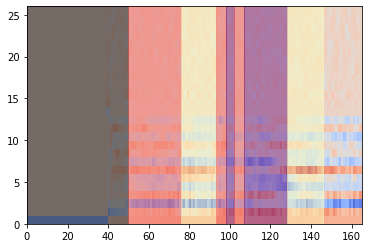

In [35]:
plt.pcolormesh(mfccs_and_deltas.T, cmap=get_cmap("coolwarm"))
current_label = 0
current_index = 0
for index, label in enumerate(resuls.labels_):
    if label!= current_label:
        plt.axvspan(current_index,index, color=color_array[current_label])
        current_label = label
        current_index = index
        
        

In [23]:

magma(2222222)

(0.987053, 0.991438, 0.749504, 1.0)